# ※ 필요한 패키지 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import platform

In [2]:
df = pd.read_csv('daegu.csv', encoding = 'cp949')

In [3]:
# 아래의 전처리부분을 전부 실행하면 daegu.csv 파일이 생성됨
# 파일이 있으면 여기를 실행해서 아래의 EDA를 할 것
df_pre = pd.read_csv('daegu_pre.csv')

<hr>

# Preprocessing
#### Period
- 2022-05-06

#### Index
0. 전처리 전

1. Column : hour
2. Column : lightning
3. Column : condtion
4. Column : month
5. 전처리 후

# 0. 전처리 전

In [4]:
df

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0.0,0.0,16.500000,-1.0,53.0,53.0,390.0,1.0,6.0,2010,동인동
1,1,100.0,0.0,18.100000,-1.0,49.0,53.0,390.0,1.0,6.0,2010,동인동
2,1,200.0,0.0,19.700001,-1.0,46.0,53.0,390.0,1.0,6.0,2010,동인동
3,1,300.0,0.0,20.799999,-1.0,41.0,53.0,390.0,1.0,6.0,2010,동인동
4,1,400.0,0.0,22.200001,-1.0,36.0,53.0,390.0,2.0,6.0,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,1900.0,0.0,10.700000,NaN,71.0,2.1,335.0,NaN,4.0,2022,구지면
14831612,30,2000.0,0.0,11.000000,NaN,65.0,2.2,339.0,NaN,4.0,2022,구지면
14831613,30,2100.0,0.0,11.900000,NaN,61.0,2.2,338.0,NaN,4.0,2022,구지면
14831614,30,2200.0,0.0,13.400000,NaN,53.0,2.0,351.0,NaN,4.0,2022,구지면


## 1. Column :  hour
- 시간이 24시간 형식으로 되어있음
- 시간뒤에 분을 나타내는 00이 따라옴
<br><br>
- 분은 항상 00으로 표시되므로 필요없는 데이터로 제거

In [4]:
df1 = df[:]
df1['hour'] = df['hour']/100
df1['hour'] = df1['hour'].astype(int)

In [6]:
df1

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1.0,53.0,53.0,390.0,1.0,6.0,2010,동인동
1,1,1,0.0,18.100000,-1.0,49.0,53.0,390.0,1.0,6.0,2010,동인동
2,1,2,0.0,19.700001,-1.0,46.0,53.0,390.0,1.0,6.0,2010,동인동
3,1,3,0.0,20.799999,-1.0,41.0,53.0,390.0,1.0,6.0,2010,동인동
4,1,4,0.0,22.200001,-1.0,36.0,53.0,390.0,2.0,6.0,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,NaN,71.0,2.1,335.0,NaN,4.0,2022,구지면
14831612,30,20,0.0,11.000000,NaN,65.0,2.2,339.0,NaN,4.0,2022,구지면
14831613,30,21,0.0,11.900000,NaN,61.0,2.2,338.0,NaN,4.0,2022,구지면
14831614,30,22,0.0,13.400000,NaN,53.0,2.0,351.0,NaN,4.0,2022,구지면


## 2. Column : lightning
- 0, 1 로 번개의 여부를 표현
    0 : 번개 X
    1 : 번개 O
    -1 : 미측정
- 어느날을 기준으로 측정하지 않아 None 값이 저장
<br><br>
- -1과 None 값을 통일시켜줄 필요가 있음

In [5]:
df2 = df1[:]
df2['lightning'] = df2['lightning'].fillna(-1)
df2['lightning'] = df2['lightning'].astype(int)

In [8]:
df2

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1.0,6.0,2010,동인동
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1.0,6.0,2010,동인동
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1.0,6.0,2010,동인동
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1.0,6.0,2010,동인동
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2.0,6.0,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,NaN,4.0,2022,구지면
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,NaN,4.0,2022,구지면
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,NaN,4.0,2022,구지면
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,NaN,4.0,2022,구지면


## 3. Column : condition
- 1,2,3,4 로 구름의 양을 표현
    - 1 : 맑음
    - 2 : 구름 조금
    - 3 : 구름 많음
    - 4 : 흐림
    - -1 : 미측정
- 어느날을 기준으로 측정하지 않아 None 값이 저장
<br><br>
- -1과 None 값을 통일시켜줄 필요가 있음

In [6]:
df3 = df2[:]
df3['condition'] = df3['condition'].fillna(-1)
df3['condition'] = df3['condition'].astype(int)

In [8]:
df3

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6.0,2010,동인동
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6.0,2010,동인동
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6.0,2010,동인동
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6.0,2010,동인동
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6.0,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4.0,2022,구지면
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4.0,2022,구지면
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4.0,2022,구지면
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4.0,2022,구지면


## 4. Column : month
- 월을 정수형으로 표현

In [7]:
df4 = df3[:]
df4['month'] = df4['month'].astype(int)

In [10]:
df4

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4,2022,구지면
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4,2022,구지면
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4,2022,구지면
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4,2022,구지면


## 5. 전처리 후

In [11]:
df_final = df4
df_final

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4,2022,구지면
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4,2022,구지면
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4,2022,구지면
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4,2022,구지면


In [12]:
# 전처리된 데이터프레임을 저장한 뒤 이후에는 해당 파일을 불러서 사용
df_final.to_csv('daegu_pre.csv', index_label=False)

<hr>

# EDA

#### Period
- 2022-05-06 ~ ???

#### Index
0. 기본적인 데이터 탐색

1. 겨울에 따뜻하면 여름에 폭염이 나타난다.
2. 인구밀도가 높은 지역은 상대적으로 열지수가 높다.
3. 지역용도에 따라 열지수의 차이가 나타난다.( 공단,상업,주거,산지,빌딩숲 등)
4. 기저질환 환자가 온열질환 취약계층이다.
5. 대구의 지형 특징상(분지) 열섬현상이 자주 발생한다.
6. 겨울에 추우면 전력 소비량과 온실 가스 배출량이 늘어 여름에 덥다.
7. 교통량이 많으면 엔진의 열배출이 기온에 영향을 미친다. 
8. 비가 온 날이 많으면 폭염기간에 열지수가 높다. (폭염과 습도의 관계)
9. 대기중의 미세먼지 농도가 높으면 온도가 높다.(‘미세먼지가 많으면 통풍이 잘 안된다’ 속설 검증)
10. 나무를 많이 심으면 온도가 떨어진다. (대구 녹지사업 참고)

## 0. 기본적인 데이터 탐색
- made by SSJ

#### 1. year
요약
- 값이 없는 None이 없음
- 2010년부터 2022년까지 존재
- 2010년과 2022년은 모든 월이 있는게 아니므로 일수가 적음
- 윤년에 해당하는 날은 하루치인 296개의 데이터가 더 존재

In [9]:
df_final['year'].isna().sum()

0

c:\github\Team_Project\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


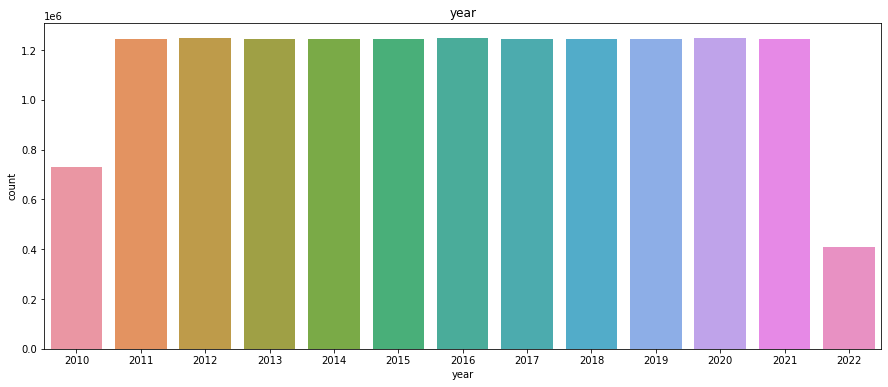

In [10]:
fig = plt.figure(figsize=(15,6))
ax = sns.countplot(df_final['year'])
plt.title('year')
plt.show()

In [11]:
temp = []
for i in range(2010,2023):
    result = df_final[df_final['year'] == i].size
    print("{0:>4}년 :".format(i), "{0:>8}".format(result))
    temp.append(result)

2010년 :  8751744
2011년 : 14927040
2012년 : 14967936
2013년 : 14927040
2014년 : 14927040
2015년 : 14927040
2016년 : 14967936
2017년 : 14927040
2018년 : 14927040
2019년 : 14927040
2020년 : 14967936
2021년 : 14927040
2022년 :  4907520


#### 2. month
요약
- 2010년에는 6월부터 데이터가 존재
- 2022년에는 5월부터 데이터가 없음

In [12]:
def encode_sin_cos(df_,col_n,max_val):
    df_[col_n+'_sin'] = np.sin(2*np.pi*df_[col_n]/max_val)
    df_[col_n+'_cos'] = np.cos(2*np.pi*df_[col_n]/max_val)
    
    return df_

df_month = df_pre[['day','hour','month','year']]

data_month = encode_sin_cos(df_month,'month',12)
data_month = encode_sin_cos(df_month,'day',31)

C:\Users\User\AppData\Local\Temp\ipykernel_5772\1351274675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[col_n+'_sin'] = np.sin(2*np.pi*df_[col_n]/max_val)
C:\Users\User\AppData\Local\Temp\ipykernel_5772\1351274675.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_[col_n+'_cos'] = np.cos(2*np.pi*df_[col_n]/max_val)
C:\Users\User\AppData\Local\Temp\ipykernel_5772\1351274675.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

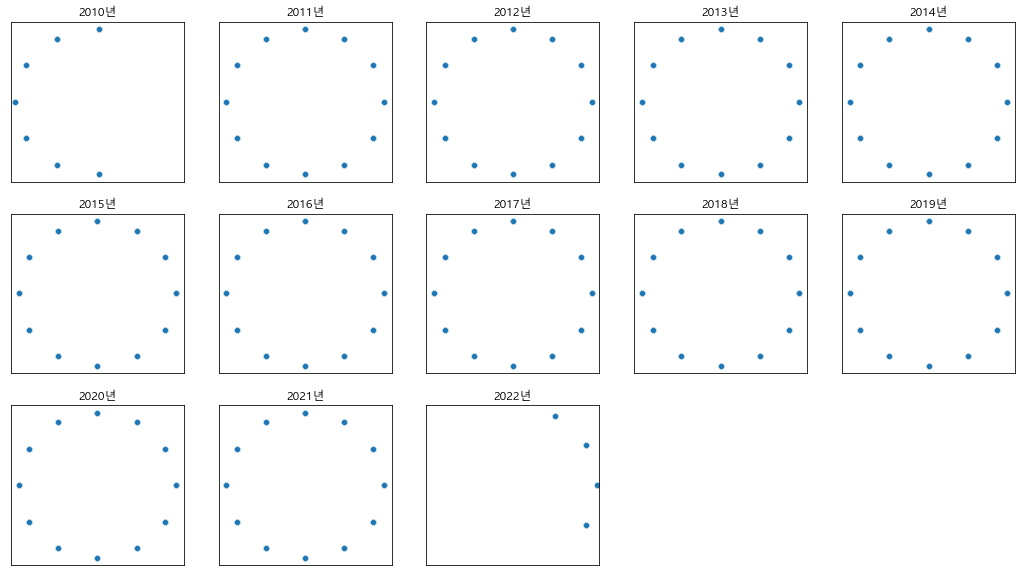

In [13]:
year = [2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022]

fig = plt.figure(figsize=(18,10))
plt.rc('font', family = 'Malgun Gothic')
for n,y in enumerate(year):
    ax = plt.subplot(3,5,n+1)
    sns.scatterplot(x="month_sin",y="month_cos",data=data_month[data_month['year'] == y])
    plt.xticks([-1, 0, 1])
    plt.yticks([-1, 0, 1])
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    plt.title(str(y)+"년")
    

#### 3. day
- 1일부터 28일까지 동일한 값이 나옴
- 29, 30, 31로 갈수록 count가 점점 줄어듦

c:\github\Team_Project\.venv\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


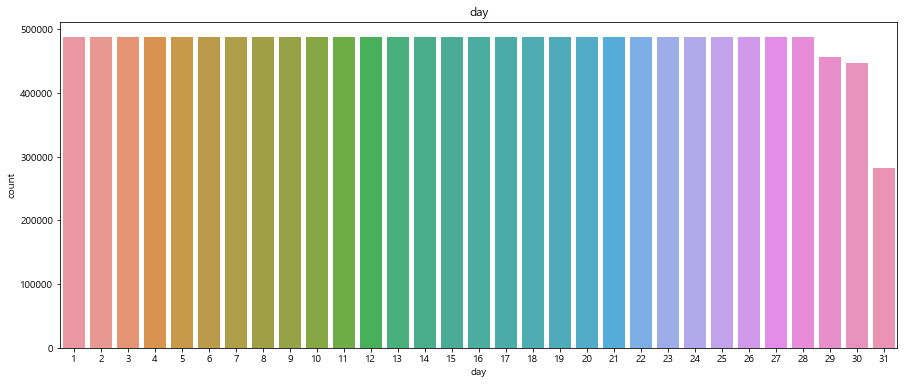

In [14]:
fig = plt.figure(figsize=(15,6))
ax = sns.countplot(df_final['day'])
plt.title('day')
plt.show()

In [15]:
for i in range(1,32):
    result = df_final[df_final['day'] == i].size
    print("{0:>2}일".format(i), result, end='\t\t')
    if i % 4 == 0:
        print('')

 1일 5848128		 2일 5848128		 3일 5848128		 4일 5848128		
 5일 5848128		 6일 5848128		 7일 5848128		 8일 5848128		
 9일 5848128		10일 5848128		11일 5848128		12일 5848128		
13일 5848128		14일 5848128		15일 5848128		16일 5848128		
17일 5848128		18일 5848128		19일 5848128		20일 5848128		
21일 5848128		22일 5848128		23일 5848128		24일 5848128		
25일 5848128		26일 5848128		27일 5848128		28일 5848128		
29일 5480064		30일 5357376		31일 3394368		

#### 4. hour

# 1. 겨울에 따뜻하면 여름에 폭염이 나타난다.
- made by 

# 2. 인구밀도가 높은 지역은 상대적으로 열지수가 높다.
- made by 

# 3. 지역용도에 따라 열지수의 차이가 나타난다.( 공단,상업,주거,산지,빌딩숲 등)
- made by 

# 4. 기저질환 환자가 온열질환 취약계층이다.
- made by 

# 5. 대구의 지형 특징상(분지) 열섬현상이 자주 발생한다.
- made by 

# 6. 겨울에 추우면 전력 소비량과 온실 가스 배출량이 늘어 여름에 덥다.
- made by 

# 7. 교통량이 많으면 엔진의 열배출이 기온에 영향을 미친다. 
- made by 

# 8. 비가 온 날이 많으면 폭염기간에 열지수가 높다. (폭염과 습도의 관계)
- made by MJ

In [8]:
# 한글 출력 오류
system_name = platform.system()
if system_name == 'Windows':
    # Windows 운영체제
    plt.rc('font', family='Malgun Gothic')
elif system_name == 'Darwin':
    # Mac OS
    plt.rc('font', family='AppleGothic')
elif system_name == 'Linux':
    # Linux
    path = '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'
    font_name = fm.FontProperties(fname=path, size=12)
    plt.rc('font', family=font_name)
else:
    print("Not support")

In [9]:
# 열지수 컬럼 생성
df5 = df4[:]

df5['temp_F'] = df5['temp'] * 1.8 + 32

df5['HI'] =  -42.379 + 2.04901523*df5['temp_F'] + 10.14333127*df5['humidity'] - .22475541*df5['temp_F']*df5['humidity'] - .00683783*df5['temp_F']*df5['temp_F'] - .05481717*df5['humidity']*df5['humidity'] + .00122874*df5['temp_F']*df5['temp_F']*df5['humidity'] + .00085282*df5['temp_F']*df5['humidity']*df5['humidity'] - .00000199*df5['temp_F']*df5['temp_F']*df5['humidity']*df5['humidity']

index = list(df5[(df5['humidity'] <= 13) & (df5['temp_F'] >= 80) & (df5['temp_F'] <= 112)].index)
df5.loc[index,'HI'] = df5.loc[index,'HI'] - ((13 - df5.loc[index,'humidity']) / 4) * ((17 - abs(df5.loc[index,'temp_F'] - 95)) / 17) ** 0.5

index = list(df5[(df5['humidity'] > 85) & (df5['temp_F'] >= 80) & (df5['temp_F'] <= 87)].index)
df5.loc[index,'HI'] = df5.loc[index,'HI'] + 0.02 * (df5.loc[index,'humidity'] - 85) * (87 - df5.loc[index,'temp_F'])

df5['A'] = -10.3 + 1.1 * df5['temp_F'] + 0.047 * df5['humidity']
index = list(df5.loc[df5['A'] < 79].index)
df5.loc[index,'HI'] = df5.loc[index,'A']

index = list(df5.loc[df5['temp_F'] < 40].index)
df5.loc[index,'HI'] = df5.loc[index,'temp_F']

df5.drop(columns = ['A'], axis=1, inplace=True)
df5.drop(columns = 'temp_F', axis=1, inplace=True)
df5['HI'] = (df5['HI'] - 32) / 1.8
df5

C:\Users\User\AppData\Local\Temp\ipykernel_12472\4193576842.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['temp_F'] = df5['temp'] * 1.8 + 32
C:\Users\User\AppData\Local\Temp\ipykernel_12472\4193576842.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['HI'] =  -42.379 + 2.04901523*df5['temp_F'] + 10.14333127*df5['humidity'] - .22475541*df5['temp_F']*df5['humidity'] - .00683783*df5['temp_F']*df5['temp_F'] - .05481717*df5['humidity']*df5['humidity'] + .00122874*df5['temp_F']*df5['temp_F']*df5['

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,HI
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동,15.589444
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동,17.245000
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동,18.926668
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동,20.006110
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동,21.415557
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4,2022,구지면,9.679444
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4,2022,구지면,9.852778
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4,2022,구지면,10.738333
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4,2022,구지면,12.179444


In [10]:
# 복사본으로 작업
EDAset = df5.copy()
#EDAset = df_final.copy()

In [11]:
# 날짜 컬럼 생성
EDAset['date'] = pd.to_datetime(EDAset[['year', 'month', 'day','hour']])

# 관측오류, 결측치를 nan 값으로 통일
EDAset = EDAset.replace({'humidity':-1.0,'rainfall':-1.0, 'temp':-50}, np.nan)
# 관측오류, 결측치를 이전 값으로 대체
EDAset = EDAset.fillna(method='bfill') 

##### 전체 구역에 대해 그 달의 비가 온 날을 카운트한 막대그래프 & 그 달의 최고기온을 그린 선그래프
1. 연도별 매월 우천일의 수와 최고 열지수
    + 연도별 전체 우천일의 수와 최고 열지수
2. 연도별 일일 평균 강수량과 열지수
3. 습도와 기온의 상관관계
4. 매년 월별 평균 습도와 평균 기온
5. 전체 달의 평균 강수량과 평균 기온

#### 1. 각 해, 달마다 비가 온 날의 수와 최고 열지수

In [13]:
# 2011년, 동인동 기준
condyear = EDAset['year'] == 2011
condregion = EDAset['region'] == '동인동'
df2011_DI = EDAset[condyear & condregion]
rainfall = df2011_DI.copy()

In [14]:
# 비 온 날 카운트
count_rain = []
max_HI = []
max_hum = []
month = []


for i in range(1,13) :
    rain_temp = rainfall[rainfall['month'] == i]
    # 비 온 날 카운트 리스트
    cond = rain_temp[rain_temp['rainfall'] > 0.0]
    count_rain.append(cond.count())
    # 최고기온 리스트
    max_HI.append(round(rain_temp['HI'].max(),2))
    # 최고습도 리스트
    max_hum.append(rain_temp['humidity'].max())
    # 데이터 있는 달 리스트
    month.append(i)

# 출력
counts_rain = [i[0] for i in count_rain]

print("측정달", month)
print("우천 발생수 (시간당)", counts_rain)
print("최고 열지수", max_HI)
print("최고 습도", max_hum)

측정달 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
우천 발생수 (시간당) [0, 47, 8, 60, 59, 50, 86, 73, 21, 37, 49, 10]
최고 열지수 [4.2, 17.69, 20.22, 27.02, 28.47, 35.64, 39.06, 37.96, 35.92, 25.72, 24.7, 10.15]
최고 습도 [89.0, 90.0, 90.0, 93.0, 93.0, 91.0, 93.0, 98.0, 93.0, 100.0, 95.0, 91.0]


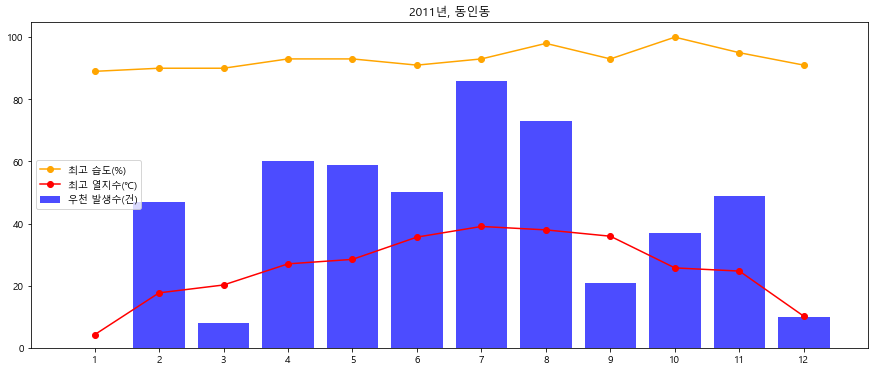

In [15]:
# 시각화
plt.figure(figsize=(15,6))
plt.title('2011년, 동인동')

plt.plot(month, max_hum, color='orange', marker = 'o', label='최고 습도(%)', linestyle='-')
plt.bar(month, counts_rain, color='blue', label='우천 발생수(건)', alpha=0.7)
plt.plot(month, max_HI, color='red', marker = 'o', label='최고 열지수(℃)', linestyle='-')

plt.legend(loc=6)
plt.xticks(month)
plt.show()

- 전체 데이터 (추가할 것)

In [16]:
# 연도별 우천일 수
rainset = EDAset.copy()
RS = rainset.groupby('year')['rainfall'].nunique().reset_index()
RS

,year,rainfall
0,2010,37
1,2011,38
2,2012,42
3,2013,48
4,2014,39
5,2015,22
6,2016,180
7,2017,161
8,2018,157
9,2019,52


In [17]:
# 연도별 최대 열지수
setmax_HI = []
year = []

for i in range(2010,2023) :
    HI_temp = EDAset[EDAset['year'] == i]
    # 최고기온 리스트
    setmax_HI.append(round(HI_temp['HI'].mean(),2))
    # 데이터 있는 연도 리스트
    year.append(i)

# 출력
print("측정연도", year)
print("평균 열지수", setmax_HI)

측정연도 [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]
평균 열지수 [18.37, 13.64, 13.29, 14.33, 14.08, 14.0, 14.3, 14.02, 14.09, 14.53, 14.36, 14.37, 6.24]


In [18]:
maxHI = pd.DataFrame(data = list(zip(setmax_HI, year)), columns = ['max HI', 'year'])

<AxesSubplot:ylabel='열지수 (℃)'>

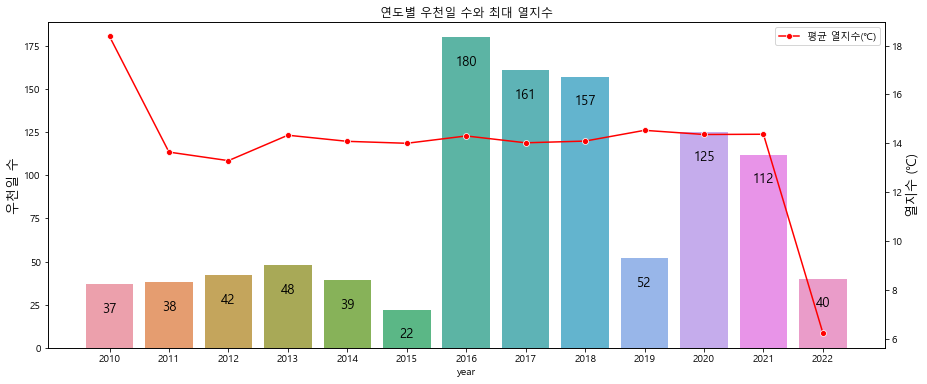

In [19]:
ax1 = sns.set_style(style=None, rc=None)

fig, ax1 = plt.subplots(figsize=(15,6))
ax1.set_title("연도별 우천일 수와 최대 열지수")
sns.barplot(
    data = RS,
    x = "year",
    y = "rainfall",
    alpha=0.9,
    ax=ax1)

for p in ax1.patches:
    ax1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height() - 20),
    ha='center', va='center', fontsize=13, color='black', xytext=(0,10),
    textcoords='offset points')
ax1.set_ylabel("우천일 수", fontsize=13)

ax2 = ax1.twinx()
ax2.set_ylabel("열지수 (℃)", fontsize=13)
sns.lineplot(
    data = maxHI['max HI'],
    marker='o',
    sort = False,
    color='red',
    label='평균 열지수(℃)',
    ax=ax2)

#### 2. 매년 일일 평균 강수량 + 열지수

In [20]:
# 동인동 기준
df2011 = EDAset[condregion]
rainheat = df2011.copy()

In [21]:
day_rain = [] # 일별 평균 강수량
day_HI = [] # 일별 평균 온도
datelist = []

for i in year :
    rainheat_year = rainheat[rainheat['year'] == i]
    for j in range (1,13) :
        rainheat_month = rainheat[rainheat['month'] == j]
        if j<10:
            j = str(0)+str(j)

        for k in range (1,32) :
            rainheat_day = rainheat[rainheat['day'] == k]
            if k<10:
                k = str(0)+str(k)

            day_rain.append(round(rainheat_day['rainfall'].mean(),2))
            day_HI.append(round(rainheat_day['HI'].mean(),2))

            tp ='{0}-{1}-{2}'.format(i, j, k)
            datelist.append(tp)


In [22]:
# 인덱스와 열 이름 지정
df_mean = pd.DataFrame(zip(datelist, day_rain, day_HI), columns = ['date', 'rainfall', 'HI'])

df_mean['date'] = df_mean['date'].astype('str')
df_mean['year'] = df_mean['date'].str.split('-').str[0]
df_mean['month'] = df_mean['date'].str.split('-').str[1]
df_mean['day'] = df_mean['date'].str.split('-').str[2]

In [23]:
temp_mean = df_mean.loc[:,['year','month','day','rainfall','HI']]
temp_mean['date'] = pd.to_datetime(temp_mean[['year', 'month', 'day']], format='%Y-%m-%d', errors='coerce')

tt_mean = temp_mean.copy()
tt_mean = tt_mean.astype({'year':'int', 'month':'int', 'day':'int'})
tt_mean = tt_mean.dropna(how='any')

### 연도별 그래프

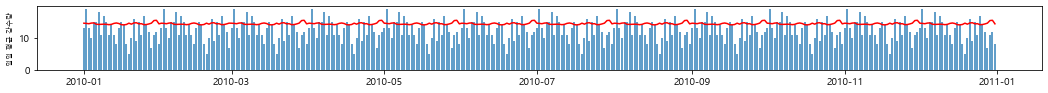

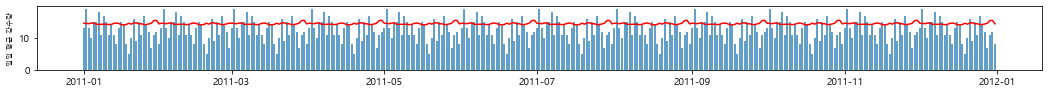

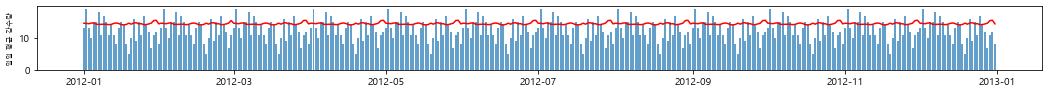

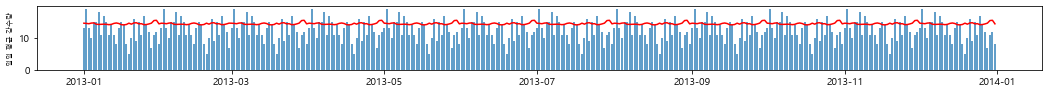

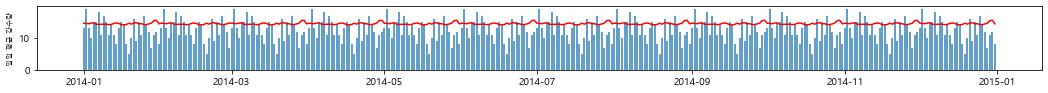

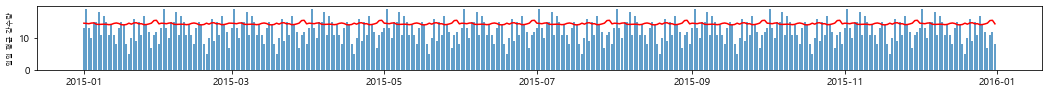

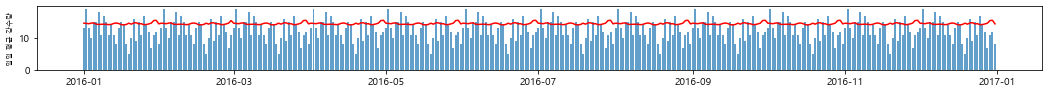

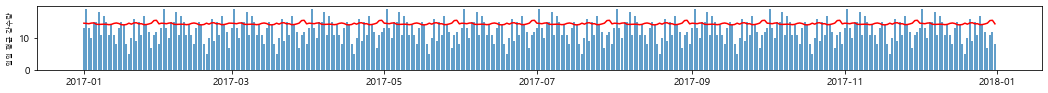

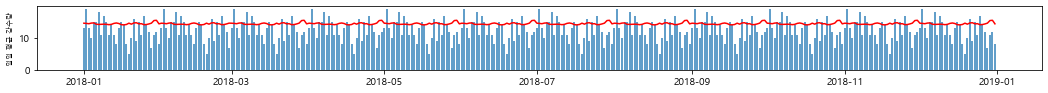

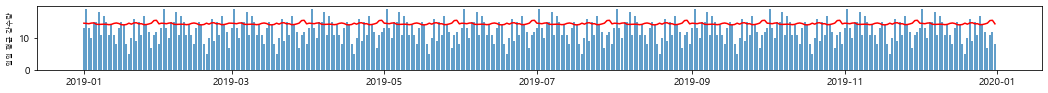

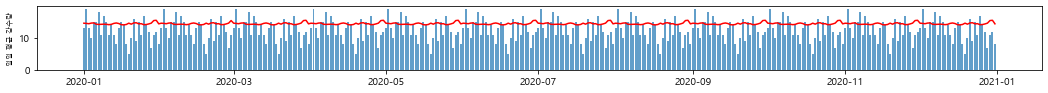

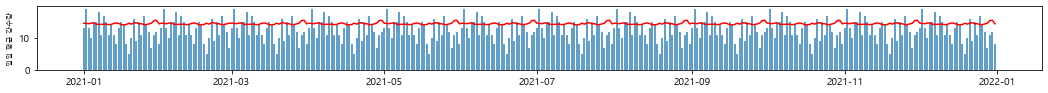

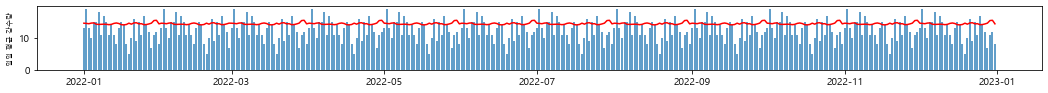

In [122]:
for i in range(2010,2023):
    temp_mean = tt_mean[tt_mean['year'] == i]

    x = temp_mean['date']
    y = temp_mean['rainfall']
    z = temp_mean['HI']

    plt.figure(figsize=(18,18))
    plt.subplot(13,1,i-2009)

    plt.bar(x, 100*y, alpha = 0.7)
    plt.plot(x, z, color='red')
    plt.ylabel("일일 평균 강수량", fontsize=7)
    plt.show()

#### 3. 습도+기온 상관관계 그래프

In [25]:
# 동인동 기준
df2011 = EDAset[condregion]
humheat = df2011.copy()

In [26]:
corr = humheat.corr()
print(corr)

                         day          hour  rainfall      temp  lightning  \
day             1.000000e+00  1.138786e-17 -0.011828  0.008958  -0.000079   
hour            1.138786e-17  1.000000e+00  0.004850 -0.209047  -0.000728   
rainfall       -1.182842e-02  4.850153e-03  1.000000  0.055760   0.018512   
temp            8.957623e-03 -2.090465e-01  0.055760  1.000000   0.069688   
lightning      -7.892722e-05 -7.280889e-04  0.018512  0.069688   1.000000   
humidity        1.097454e-02  3.901959e-01  0.207452  0.171576   0.022973   
wind_speed     -9.673544e-03 -3.038010e-02  0.017480  0.132038  -0.259785   
wind_direction -1.148035e-03 -1.196051e-01 -0.034649 -0.068691  -0.046028   
condition      -1.486562e-03 -9.509045e-03  0.088662  0.170089   0.717462   
month           1.066542e-02  3.523576e-16  0.021134  0.207874   0.016379   
year           -1.701954e-03  1.265251e-15 -0.020369 -0.048361  -0.476501   
HI              8.032308e-03 -1.864247e-01  0.060324  0.985180   0.075196   

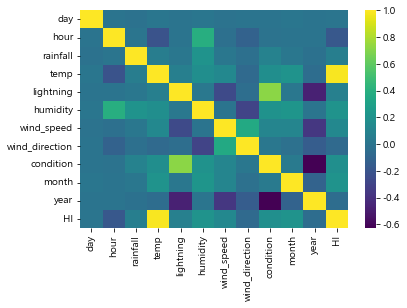

In [40]:
matplotlib.rcParams['axes.unicode_minus'] = False
sns.heatmap(corr, cmap='viridis')
plt.show()

- 삼각형 상관관계 그래프

C:\Users\User\AppData\Local\Temp\ipykernel_14736\2104179104.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df_corr, dtype=np.bool)


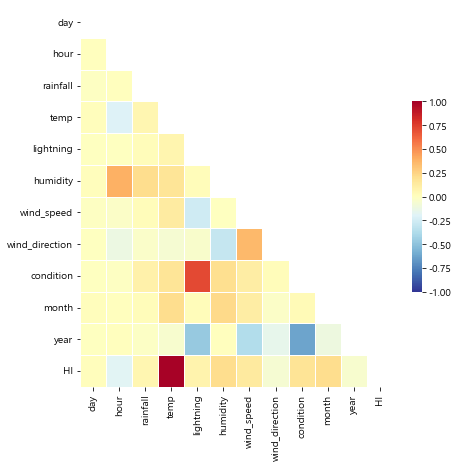

In [41]:
df_corr = humheat.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True # 삼각형으로 표시

sns.heatmap(df_corr, 
            cmap = 'RdYlBu_r', 
            annot = False,   # 실제 값을 표시한다
            mask=mask,      # 표시하지 않을 마스크 부분을 지정한다
            linewidths=.5,  # 경계면 실선으로 구분하기
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

<AxesSubplot:ylabel='기온 (℃)'>

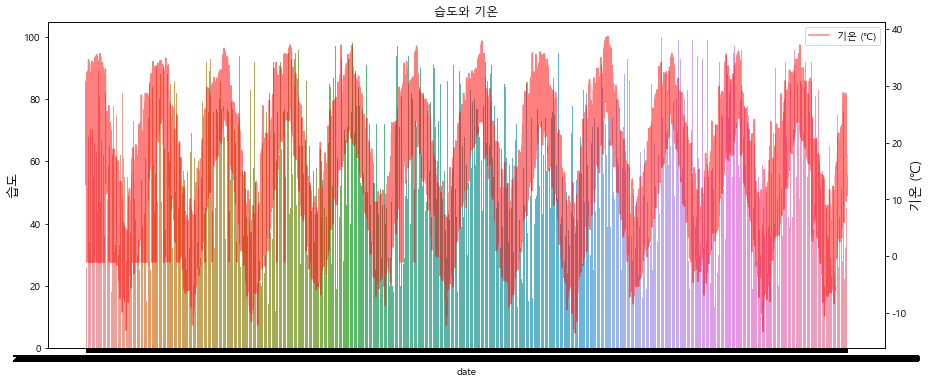

In [46]:
ax1 = sns.set_style(style=None, rc=None)

fig, ax1 = plt.subplots(figsize=(15,6))
ax1.set_title("습도와 기온")
sns.barplot(
    data = rainheat,
    x = "date",
    y = "humidity",
    alpha=0.9,
    ax=ax1
    )

ax1.set_ylabel("습도", fontsize=13)

ax2 = ax1.twinx()
ax2.set_ylabel("기온 (℃)", fontsize=13)

sns.lineplot(
    data = rainheat['temp'],
    sort = False,
    color='red',
    label='기온 (℃)',
    ax=ax2,
    alpha=0.5
    )

#plt.show()

#### 4. 년도별 매달 평균 습도 + 평균 기온

In [30]:
# 동인동 기준
df2011 = EDAset[condregion]
humheat = df2011.copy()

In [31]:
day_hum = [] # 일별 평균 습도
day_temp2 = [] # 일별 평균 온도 (방법2와 동일한 변수)
datelist2 = [] # (방법2와 동일한 변수)

for i in year :
    humheat_year = humheat[humheat['year'] == i]
    for j in range (1,13) :
        humheat_month = humheat[humheat['month'] == j]
        if j<10:
            j = str(0)+str(j)

        for k in range (1,32) :
            humheat_day = humheat[humheat['day'] == k]
            if k<10:
                k = str(0)+str(k)

            day_hum.append(round(humheat_day['humidity'].mean(),2))
            day_temp2.append(round(humheat_day['temp'].mean(),2))

            tp ='{0}-{1}-{2}'.format(i, j, k)
            datelist2.append(tp)


In [33]:
# 인덱스와 열 이름 지정
df_mean2 = pd.DataFrame(zip(datelist2, day_hum, day_temp2), columns = ['date', 'humidity', 'temp'])

df_mean2['date'] = df_mean2['date'].astype('str')
df_mean2['year'] = df_mean2['date'].str.split('-').str[0]
df_mean2['month'] = df_mean2['date'].str.split('-').str[1]
df_mean2['day'] = df_mean2['date'].str.split('-').str[2]

In [34]:
temp_mean2 = df_mean2.loc[:,['year','month','day','humidity','temp']]
temp_mean2['date'] = pd.to_datetime(temp_mean2[['year', 'month', 'day']], format='%Y-%m-%d', errors='coerce')

tt_mean2 = temp_mean2.copy()
tt_mean2 = tt_mean2.astype({'year':'int', 'month':'int', 'day':'int'})
tt_mean2 = tt_mean2.dropna(how='any')

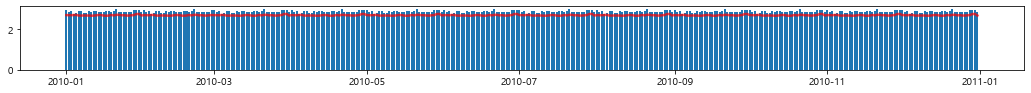

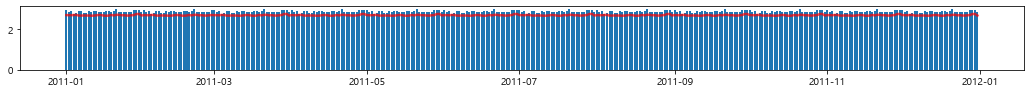

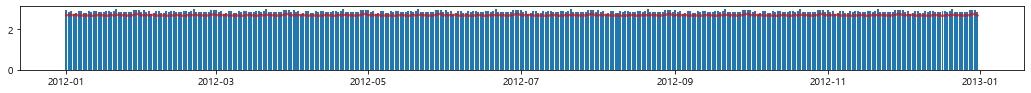

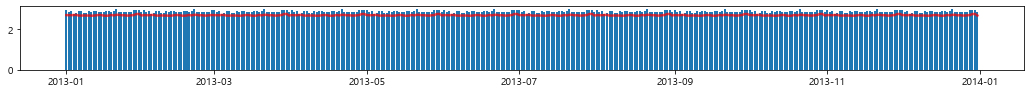

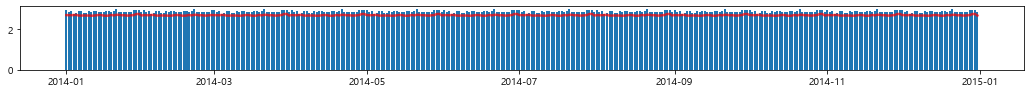

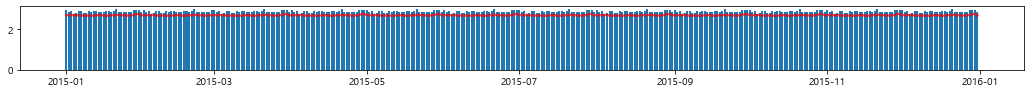

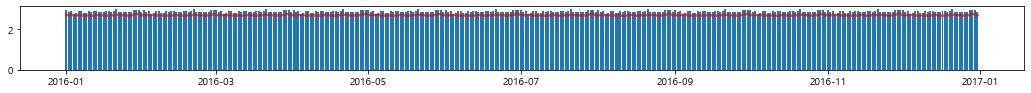

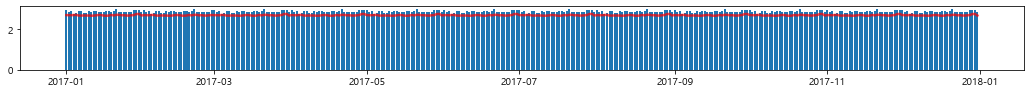

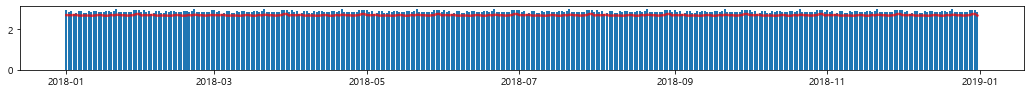

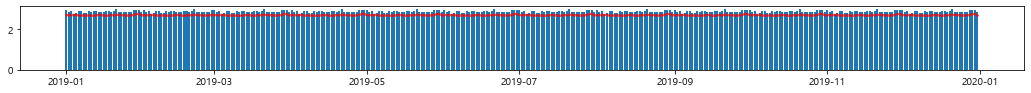

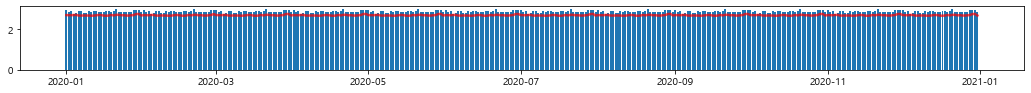

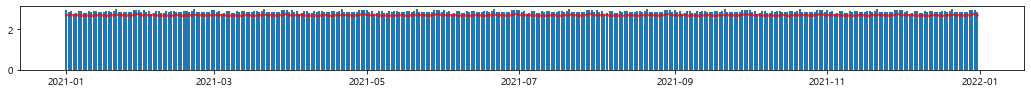

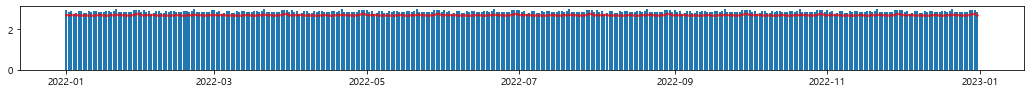

In [35]:
for i in range(2010,2023):
    temp_mean2 = tt_mean2[tt_mean2['year'] == i]

    x = temp_mean2['date']
    y = temp_mean2['humidity']
    z = temp_mean2['temp']

    plt.figure(figsize=(18,18))
    plt.subplot(13,1,i-2009)

    plt.bar(x, y*0.05)
    plt.plot(x, np.log(z), color='red', linewidth = 2.5, alpha = 0.7)
    plt.show()

##### 우천 데이터프레임으로 작업

In [36]:
# 그냥 해봄
cond = EDAset['humidity'] != 0.0
df_rain = EDAset[cond]

print("우천 일 수 :",len(df_rain))

우천 일 수 : 14830933


<Figure size 1080x432 with 0 Axes>

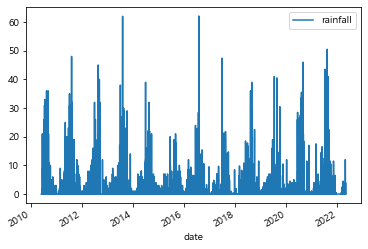

In [37]:
fig = plt.figure(figsize=(15,6))
EDAset.plot(x='date', y='rainfall')
plt.show()

#### 5. 모든 달의 평균 강수량 + 평균 기온

In [38]:
# 평균계산
temp = []
humd = []
month = []

for i in range(1,13) :
    humd_high = EDAset[EDAset['date'].dt.month == i]

    #최고기온 평균
    temp.append(round(humd_high['temp'].mean(),1))

    #강수량 평균
    humd.append(round(humd_high['humidity'].mean(),1))

    month.append(i)

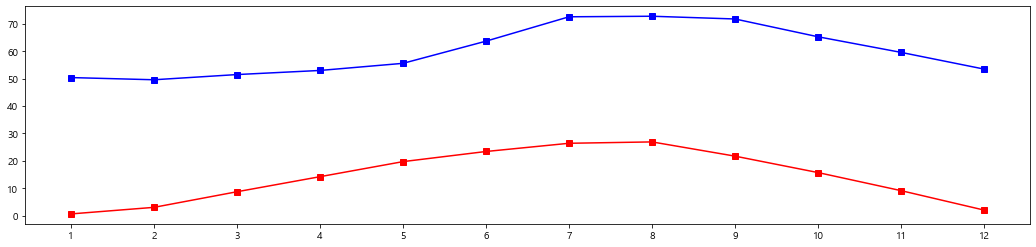

In [39]:
# 그래프 그리기
x_axis = EDAset['date'].dt.month.unique()

plt. figure(figsize=(18,4))

#plt.title('%s년부터 %s년까지 %s월의 기온 변화' % (year_start, year_end, i_month))
plt.plot(month, temp, color='red', marker = 's', label='평균기온', linestyle='-')
plt.plot(month, humd, color='blue', marker = 's', label='평균습도', linestyle='-')
#plt.legend(loc=2)
plt.xticks(month)
plt.show()

##### 특정 동 (도심에 해당하는 포정동, 종로, 동성로)에 대하여 EDA?

# 9. 대기중의 미세먼지 농도가 높으면 온도가 높다.(‘미세먼지가 많으면 통풍이 잘 안된다’ 속설 검증)
- made by MJ

In [12]:
# 미세먼지 데이터 불러오기
orig = pd.read_csv('./dataset/airpollution_daegu.csv', encoding='cp949')
orig

,지점,지점명,일시,1시간평균 미세먼지농도(㎍/㎥)
0,143,대구,2010-06-01 0:00,9.5
1,143,대구,2010-06-01 1:00,12.0
2,143,대구,2010-06-01 2:00,9.0
3,143,대구,2010-06-01 3:00,8.0
4,143,대구,2010-06-01 4:00,6.0
...,...,...,...,...
99569,143,대구,2022-04-30 19:00,23.0
99570,143,대구,2022-04-30 20:00,18.0
99571,143,대구,2022-04-30 21:00,18.0
99572,143,대구,2022-04-30 22:00,15.0


- 전처리

In [13]:
# 분석용 데이터셋으로 정리
df_airpoll = orig.iloc[:,2:]
df_airpoll.columns = ['date','concentration']
df_airpoll

,date,concentration
0,2010-06-01 0:00,9.5
1,2010-06-01 1:00,12.0
2,2010-06-01 2:00,9.0
3,2010-06-01 3:00,8.0
4,2010-06-01 4:00,6.0
...,...,...
99569,2022-04-30 19:00,23.0
99570,2022-04-30 20:00,18.0
99571,2022-04-30 21:00,18.0
99572,2022-04-30 22:00,15.0


In [14]:
# date 컬럼의 자료형을 알맞게 변환
df_airpoll['date'] = df_airpoll['date'].astype(str)
df_airpoll['date'] = pd.to_datetime(df_airpoll['date'])

In [19]:
df_airpoll

,date,concentration
0,2010-06-01 00:00:00,9.5
1,2010-06-01 01:00:00,12.0
2,2010-06-01 02:00:00,9.0
3,2010-06-01 03:00:00,8.0
4,2010-06-01 04:00:00,6.0
...,...,...
99569,2022-04-30 19:00:00,23.0
99570,2022-04-30 20:00:00,18.0
99571,2022-04-30 21:00:00,18.0
99572,2022-04-30 22:00:00,15.0


In [15]:
# date 컬럼을 각 요소로 나누기
df_airpoll['year'] = df_airpoll['date'].dt.year
df_airpoll[ 'month'] = df_airpoll['date'].dt.month
df_airpoll['day'] = df_airpoll['date'].dt.day
df_airpoll['hour'] = df_airpoll['date'].dt.hour

In [21]:
df_airpoll

,date,concentration,year,month,day,hour
0,2010-06-01 00:00:00,9.5,2010,6,1,0
1,2010-06-01 01:00:00,12.0,2010,6,1,1
2,2010-06-01 02:00:00,9.0,2010,6,1,2
3,2010-06-01 03:00:00,8.0,2010,6,1,3
4,2010-06-01 04:00:00,6.0,2010,6,1,4
...,...,...,...,...,...,...
99569,2022-04-30 19:00:00,23.0,2022,4,30,19
99570,2022-04-30 20:00:00,18.0,2022,4,30,20
99571,2022-04-30 21:00:00,18.0,2022,4,30,21
99572,2022-04-30 22:00:00,15.0,2022,4,30,22


In [16]:
# 복사본으로 작업
airpoll = df_airpoll[['date','year','month','day','hour','concentration']]

In [23]:
airpoll

,date,year,month,day,hour,concentration
0,2010-06-01 00:00:00,2010,6,1,0,9.5
1,2010-06-01 01:00:00,2010,6,1,1,12.0
2,2010-06-01 02:00:00,2010,6,1,2,9.0
3,2010-06-01 03:00:00,2010,6,1,3,8.0
4,2010-06-01 04:00:00,2010,6,1,4,6.0
...,...,...,...,...,...,...
99569,2022-04-30 19:00:00,2022,4,30,19,23.0
99570,2022-04-30 20:00:00,2022,4,30,20,18.0
99571,2022-04-30 21:00:00,2022,4,30,21,18.0
99572,2022-04-30 22:00:00,2022,4,30,22,15.0


In [17]:
# 미세먼지를 측정한 대구지방기상청의 소재지 (효목1동) 데이터만 선택
daegu_final = pd.read_csv('./dataset/daegu_final.csv', encoding='utf-8')

    1. 필요한 컬럼만 가져오기 - date, year, month, day, hour, temp
    2. 미세먼지 데이터와 조인하기
    3. 그래프 그리기

In [18]:
region = daegu_final['region'] == '효목1동'
hmd = EDAset[region].reset_index()

In [26]:
hmd

,index,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,HI,date
0,2088960,1,0,0.0,16.799999,-1,53.0,52.799999,389.0,1,6,2010,효목1동,15.919443,2010-06-01 00:00:00
1,2088961,1,1,0.0,17.900000,-1,50.0,52.799999,389.0,1,6,2010,효목1동,17.051111,2010-06-01 01:00:00
2,2088962,1,2,0.0,19.500000,-1,47.0,52.799999,389.0,1,6,2010,효목1동,18.732778,2010-06-01 02:00:00
3,2088963,1,3,0.0,20.900000,-1,40.0,52.799999,389.0,1,6,2010,효목1동,20.090000,2010-06-01 03:00:00
4,2088964,1,4,0.0,20.900000,-1,41.0,52.799999,389.0,2,6,2010,효목1동,20.116111,2010-06-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104443,2193403,30,19,0.0,10.800000,-1,63.0,2.000000,313.0,-1,4,2022,효목1동,9.580556,2022-04-30 19:00:00
104444,2193404,30,20,0.0,10.500000,-1,66.0,1.500000,337.0,-1,4,2022,효목1동,9.328889,2022-04-30 20:00:00
104445,2193405,30,21,0.0,12.000000,-1,60.0,1.400000,302.0,-1,4,2022,효목1동,10.822222,2022-04-30 21:00:00
104446,2193406,30,22,0.0,13.100000,-1,50.0,2.300000,286.0,-1,4,2022,효목1동,11.771111,2022-04-30 22:00:00


In [19]:
airset = hmd[['year','month','day','hour','temp']]

In [20]:
# 조인을 위해 date 컬럼 생성
airset['date'] = pd.to_datetime(airset[['year', 'month', 'day','hour']])
airset

C:\Users\User\AppData\Local\Temp\ipykernel_12472\552878553.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airset['date'] = pd.to_datetime(airset[['year', 'month', 'day','hour']])


,year,month,day,hour,temp,date
0,2010,6,1,0,16.799999,2010-06-01 00:00:00
1,2010,6,1,1,17.900000,2010-06-01 01:00:00
2,2010,6,1,2,19.500000,2010-06-01 02:00:00
3,2010,6,1,3,20.900000,2010-06-01 03:00:00
4,2010,6,1,4,20.900000,2010-06-01 04:00:00
...,...,...,...,...,...,...
104443,2022,4,30,19,10.800000,2022-04-30 19:00:00
104444,2022,4,30,20,10.500000,2022-04-30 20:00:00
104445,2022,4,30,21,12.000000,2022-04-30 21:00:00
104446,2022,4,30,22,13.100000,2022-04-30 22:00:00


##### date 컬럼을 기준으로 조인하기

In [66]:
pollset = pd.merge(airset, airpoll, left_on=['year','month','day','hour','date'], right_on = ['year','month','day','hour','date'], how='outer')

In [66]:
pollset

,year,month,day,hour,temp,date,concentration
0,2010,6,1,0,16.799999,2010-06-01 00:00:00,9.5
1,2010,6,1,1,17.900000,2010-06-01 01:00:00,12.0
2,2010,6,1,2,19.500000,2010-06-01 02:00:00,9.0
3,2010,6,1,3,20.900000,2010-06-01 03:00:00,8.0
4,2010,6,1,4,20.900000,2010-06-01 04:00:00,6.0
...,...,...,...,...,...,...,...
104443,2022,4,30,19,10.800000,2022-04-30 19:00:00,23.0
104444,2022,4,30,20,10.500000,2022-04-30 20:00:00,18.0
104445,2022,4,30,21,12.000000,2022-04-30 21:00:00,18.0
104446,2022,4,30,22,13.100000,2022-04-30 22:00:00,15.0


# 여기부터 하기

In [78]:
# 이미 결측치가 처리된 미세먼지 데이터에 반해 airset 데이터는 결측치 처리가 되지 않음
pollset['concentration'].isna().sum()


4874

In [79]:
# 미세먼지를 측정하지 않은 시간대의 index
nan_poll = list(pollset[pollset['concentration'].isna()].index)

list_temp = []
list_temp

# 연속적으로 측정하지 않은 시간대의 index
j=-1
for i in nan_poll :
    if (i-j) == 1:
        if j not in list_temp:
            list_temp.append(j)
        list_temp.append(i)
    j=i
print(len(list_temp))

3738


In [80]:
# 연속적으로 측정하지 않은 시간대의 index를 리스트로 묶어서 저장
i = list_temp[0]
temp1 = []
temp2 = []
for j in list_temp[1:]:
    if (j-i) == 1:
        if i not in temp2:
            temp2.append(i)
        temp2.append(j)
    else:
        temp1.append(temp2)
        temp2=[]
    i = j
temp1.append(temp2)

In [81]:
# 우연히 한번만 측정하지 않는 경우 앞뒤의 평균
for i in nan_poll:
    if i not in list_temp:
        pollset.loc[i,'concentration'] = (pollset.loc[i-1,'concentration'] + pollset.loc[i+1,'concentration']) / 2

In [82]:
# 연속적으로 측정하지 않은 경우
for i in temp1:
    # 직전, 직후가 NaN인 경우
    if (pollset.loc[i[0]-1,'concentration'] == np.nan) & (pollset.loc[i[-1]+1,'concentration'] == np.nan):
        for j in i:
            pollset.loc[j,'concentration'] = (pollset.loc[j-1,'concentration'] + pollset.loc[j+1,'concentration']) / 2
    # 직전 또는 직후가 NaN이 아닌 경우
    else:
        print(i)

#pollset[pollset['concentration'].isna()]

[331, 332]
[357, 358, 359, 360, 361]
[363, 364]
[906, 907, 908, 909]
[920, 921, 922, 923]
[933, 934]
[980, 981]
[983, 984, 985]
[1267, 1268, 1269, 1270, 1271, 1272]
[1274, 1275]
[1315, 1316, 1317, 1318, 1319, 1320, 1321]
[1375, 1376, 1377, 1378]
[1540, 1541, 1542, 1543, 1544]
[1590, 1591]
[1625, 1626, 1627, 1628, 1629]
[1638, 1639, 1640]
[1702, 1703]
[1712, 1713, 1714]
[1716, 1717]
[1721, 1722, 1723, 1724, 1725, 1726, 1727, 1728, 1729, 1730, 1731, 1732, 1733, 1734, 1735, 1736, 1737, 1738]
[1759, 1760, 1761, 1762, 1763, 1764, 1765, 1766, 1767]
[1811, 1812, 1813, 1814, 1815, 1816, 1817, 1818, 1819, 1820, 1821, 1822, 1823, 1824, 1825, 1826, 1827, 1828, 1829, 1830, 1831, 1832, 1833, 1834, 1835, 1836]
[1842, 1843, 1844, 1845, 1846, 1847, 1848, 1849, 1850, 1851, 1852, 1853, 1854, 1855, 1856, 1857, 1858, 1859, 1860, 1861, 1862, 1863]
[2044, 2045]
[2055, 2056, 2057, 2058, 2059, 2060, 2061, 2062, 2063, 2064, 2065]
[2151, 2152]
[2164, 2165, 2166, 2167, 2168, 2169]
[2238, 2239, 2240]
[2245, 2246]

In [83]:
pollset['concentration'].isna().sum()

3738

# 10. 나무를 많이 심으면 온도가 떨어진다. (대구 녹지사업 참고)
- made by 

In [22]:
df_region = pd.read_csv('./dataset/0 REGION.csv')
df_region

C:\Users\User\AppData\Local\Temp\ipykernel_14672\3447070485.py:1: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_region = pd.read_csv('./dataset/0 REGION.csv')


,1단계,2단계,3단계
0,대구광역시,중구,동인동
1,대구광역시,중구,삼덕동
2,대구광역시,중구,성내1동
3,대구광역시,중구,성내2동
4,대구광역시,중구,성내3동
...,...,...,...
1044924,NaN,NaN,NaN
1044925,NaN,NaN,NaN
1044926,NaN,NaN,NaN
1044927,NaN,NaN,NaN


In [23]:
index_None = df_region[df_region['1단계'].isna()].index
df_region.drop(index_None, inplace=True)
df_region.drop('1단계', axis=1, inplace=True)
df_region.columns = ['region2','region']

In [24]:
df_region

,region2,region
0,중구,동인동
1,중구,삼덕동
2,중구,성내1동
3,중구,성내2동
4,중구,성내3동
...,...,...
137,달성군,옥포읍
138,달성군,현풍읍
139,달성군,가창면
140,달성군,하빈면


In [25]:
df_pre

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동
...,...,...,...,...,...,...,...,...,...,...,...,...
14831611,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4,2022,구지면
14831612,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4,2022,구지면
14831613,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4,2022,구지면
14831614,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4,2022,구지면


In [26]:
df_10 = df_pre.merge(df_region, on='region')

In [27]:
df_10

,day,hour,rainfall,temp,lightning,humidity,wind_speed,wind_direction,condition,month,year,region,region2
0,1,0,0.0,16.500000,-1,53.0,53.0,390.0,1,6,2010,동인동,중구
1,1,1,0.0,18.100000,-1,49.0,53.0,390.0,1,6,2010,동인동,중구
2,1,2,0.0,19.700001,-1,46.0,53.0,390.0,1,6,2010,동인동,중구
3,1,3,0.0,20.799999,-1,41.0,53.0,390.0,1,6,2010,동인동,중구
4,1,4,0.0,22.200001,-1,36.0,53.0,390.0,2,6,2010,동인동,중구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14727163,30,19,0.0,10.700000,-1,71.0,2.1,335.0,-1,4,2022,구지면,달성군
14727164,30,20,0.0,11.000000,-1,65.0,2.2,339.0,-1,4,2022,구지면,달성군
14727165,30,21,0.0,11.900000,-1,61.0,2.2,338.0,-1,4,2022,구지면,달성군
14727166,30,22,0.0,13.400000,-1,53.0,2.0,351.0,-1,4,2022,구지면,달성군
